# Notes sur les cartes cognitives sur la commune de Thio

En lien avec le travail de Gregory W.

## Chargement des données

### Profils des répondants

Contenu des données profils sur la commune de Thio

In [1]:
from IPython.display import display

import logging
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import personnal_data_anonymizer as loader

logging.basicConfig(level=logging.WARNING)
BASE_DIR = Path("thio")

# chargement du csv des profils des répondants
df_profils_tous = loader.get_data(loader.PERSONAL_DATA_FILE, drop=False)
df_profils = df_profils_tous[(df_profils_tous["commune_enquete"].str.lower() == "thio")  | (df_profils_tous["commune_residence"].str.lower() == "thio")]
# on crée une colonne "depend_mine" pour les individus pour lesquels soit eux-mêmes soit un membre de la famille proche travaille dans la mine.
df_profils["depend_mine"] = df_profils["travail_mine"] | df_profils["famille_mine"]
df_profils.to_csv(BASE_DIR / "profils_thio.csv")

print(df_profils.info(show_counts=True, verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 44
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype            
---  ------                       --------------  -----            
 0   date                         20 non-null     datetime64[ns]   
 1   commune_enquete              20 non-null     object           
 2   travail_mine                 20 non-null     bool             
 3   duree_travail_mine           5 non-null      float64          
 4   famille_mine                 20 non-null     bool             
 5   habitant_nc                  20 non-null     bool             
 6   duree_presence_nc            3 non-null      float64          
 7   commune_residence            20 non-null     object           
 8   commune_miniere              20 non-null     object           
 9   duree_residence              20 non-null     float64          
 10  habite_ailleurs_nc           20 non-null     bool             
 11  age     

<ipython-input-1-3b7014562153>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_profils["depend_mine"] = df_profils["travail_mine"] | df_profils["famille_mine"]


## Cartes cognitives et thésaurus

On charge le sous-ensembles des cartes _la mine_ et _la mine dans le futur_ pour la commune de Thio.
Ici le critère est soit :

- que l'enquête est faite à Thio (19),
- soit que le répondant habite à Thio (1)

On applique aussi sur chaque carte le remplacement pour chacun des 4 niveaux (base, concept, mère, grand mère) du thesaurus.
On obtient ainsi _8 fichiers CSV_.

In [2]:
from cog_maps import CogMaps, THESAURUS_FILENAME, CM_LA_MINE_FILENAME, CM_FUTUR_FILENAME

thesaurus = CogMaps.load_thesaurus_map(THESAURUS_FILENAME)
cg_mine = CogMaps(CM_LA_MINE_FILENAME)
cg_mine.thesaurus = thesaurus
cg_mine.partition = df_profils.index.to_list()

thesaurus = CogMaps.load_thesaurus_map(THESAURUS_FILENAME)
cg_futur = CogMaps(CM_FUTUR_FILENAME)
cg_futur.thesaurus = thesaurus
cg_futur.partition = df_profils.index.to_list()

cg_mine_all, _ = cg_mine.apply_many(thesaurus)
for level in cg_mine_all:
    cg_mine_all[level].dump(BASE_DIR / f"thio_mine_{level}.csv")
cg_futur_all, _ = cg_futur.apply_many(thesaurus)
for level in cg_futur_all:
    cg_futur_all[level].dump(BASE_DIR /  f"cg_thio_futur_{level}.csv")

## Typologie des répondants


Age moyen : 41.65 sur 20 répondants


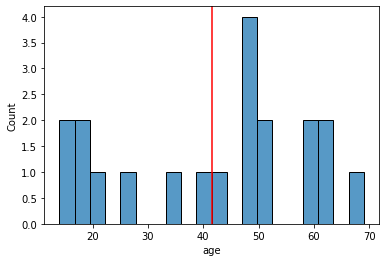

In [4]:
df_profils.value_counts(subset=["depend_mine", "commune_miniere"], sort=False)
sns.histplot(df_profils, x="age", bins=20)
plt.axvline(x=df_profils["age"].mean(), color="red")
print(f"Age moyen : {df_profils['age'].mean()} sur {len(df_profils)} répondants")